In [150]:
import pandas as pd
import numpy as np
import netCDF4
import xarray as xr
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [151]:
Sig_Eqs=pd.read_csv(r"D:\ESE5023\earthquakes-2023-11-05_23-57-13_+0800.tsv", sep='\t')

In [152]:
#1.1
#每个Country的Total Deaths求和
Sig_Eqs_1=Sig_Eqs.groupby('Country')['Total Deaths'].sum().reset_index()
#按Total Deaths的和降序排列，取前十，去掉原索引
Sig_Eqs_1=Sig_Eqs_1.sort_values(by='Total Deaths',ascending=[False])[:10].reset_index(drop=True)
Sig_Eqs_1

,Country,Total Deaths
0,CHINA,2041929.0
1,TURKEY,995648.0
2,IRAN,758650.0
3,SYRIA,437700.0
4,ITALY,422679.0
5,JAPAN,356083.0
6,HAITI,323776.0
7,AZERBAIJAN,310119.0
8,INDONESIA,282819.0
9,ARMENIA,189000.0


Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2019.0    27
 2020.0    15
 2021.0    23
 2022.0    20
 2023.0    22
Name: Mag, Length: 536, dtype: int64


<Axes: xlabel='Year'>

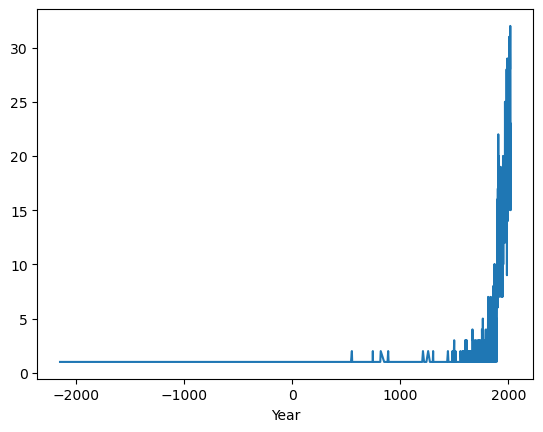

In [153]:
#1.2
#筛选Mag>6.0的数据
Sig_Eqs_2=Sig_Eqs.loc[Sig_Eqs['Mag']>6.0]
#年份-该年内6级以上地震次数
Sig_Eqs_2=Sig_Eqs_2.groupby('Year')['Mag'].count()
print(Sig_Eqs_2)
#根据年份画图
Sig_Eqs_2.plot()
#The trend is upward. There may be scientific and technological progress, rising population density and other reasons. Nowadays we have more perfect earthquake monitoring and recording than before.

In [154]:
#1.3
def CountEq_LargestEq(Country_input):
    
    #每次开始时重新读一下数据（因为后面把NAN替换为0了，多次运行的时候会导致计数有误）
    Sig_Eqs=pd.read_csv(r"D:\ESE5023\earthquakes-2023-11-05_23-57-13_+0800.tsv", sep='\t')
    a=Sig_Eqs.loc[Sig_Eqs['Country']==Country_input]['Mag']  
    #地震计数
    CountEq=a.count()

    #找最大一次地震的行数
    LargestEq_line=a.idxmax()
    if pd.isnull(LargestEq_line)== True:
        Date="No data"
    else:
        
        #找对应的时间
        #处理没有“最大地震的时间”的数据
        if np.isnan(LargestEq_line) == True:
            Date="No data"
        else:  
            #把NAN替换为0
            Sig_Eqs.fillna(0, inplace=True)
        
            Year=int(Sig_Eqs.iloc[LargestEq_line,2])
            Month=int(Sig_Eqs.iloc[LargestEq_line,3])
            Day=int(Sig_Eqs.iloc[LargestEq_line,4])
        
            #处理没有详细M、D时间记录的数据
            if Month == 0:
                Date=str(Year)
            elif Day == 0:
                Date=str(Year)+'-'+str(Month)
            else:
                Date=str(Year)+'-'+str(Month)+'-'+str(Day)
        
    #输出Country_input、CountEq
    print (str(Country_input)+': Total number of earthquakes: '+str(CountEq)+', Largest earthquake: '+str(Date))
    
    return CountEq

In [155]:
#取出所有国家的一列
Sig_Eqs_3=Sig_Eqs.groupby('Country')['Mag'].count().reset_index()
Country=Sig_Eqs_3["Country"]

#计算地震数量
CountEq_list=[]
for i in Country:
    CountEq_list.append( CountEq_LargestEq(i))
    
#拼接Country、CountEq-Date（顺序相同）
Country_list=Country.tolist()
Sig_Eqs_4=pd.DataFrame(Country_list, columns=['Country'])
Sig_Eqs_5=pd.DataFrame(CountEq_list, columns=['CountEq'])
Sig_Eqs_6= pd.concat([Sig_Eqs_4, Sig_Eqs_5],axis=1)

#降序排序
Sig_Eqs_CountEq=Sig_Eqs_6.sort_values(by='CountEq',ascending=[False]).reset_index(drop=True)
print(Sig_Eqs_CountEq)

AFGHANISTAN: Total number of earthquakes: 60, Largest earthquake: 1909-7-7
ALBANIA: Total number of earthquakes: 35, Largest earthquake: 1893-6-14
ALGERIA: Total number of earthquakes: 39, Largest earthquake: 1980-10-10
ANTARCTICA: Total number of earthquakes: 5, Largest earthquake: 1998-3-25
ANTIGUA AND BARBUDA: Total number of earthquakes: 2, Largest earthquake: 1690-4-16
ARGENTINA: Total number of earthquakes: 17, Largest earthquake: 1944-1-15
ARMENIA: Total number of earthquakes: 8, Largest earthquake: 1988-12-7
ATLANTIC OCEAN: Total number of earthquakes: 5, Largest earthquake: 1941-11-25
AUSTRALIA: Total number of earthquakes: 22, Largest earthquake: 1989-5-23
AUSTRIA: Total number of earthquakes: 2, Largest earthquake: 1590-9-15
AZERBAIJAN: Total number of earthquakes: 14, Largest earthquake: 1667-11
AZORES (PORTUGAL): Total number of earthquakes: 10, Largest earthquake: 1968-2-28
BANGLADESH: Total number of earthquakes: 15, Largest earthquake: 1918-7-8
BARBADOS: Total number of

In [156]:
#1.3的草稿（缺函数、缺最大值的日期）
'''#def CountEq_LargestEq(Country_input)
#计算每个国家发生地震的总数
Sig_Eqs_3=Sig_Eqs.groupby('Country')['Mag'].count().reset_index()
Sig_Eqs_3.rename(columns={"Mag": "CountEq"}, inplace=True)

#计算每个国家发生地震的最大级
Sig_Eqs_4=Sig_Eqs.groupby('Country')['Mag'].max().reset_index()
Sig_Eqs_4.rename(columns={"Mag": "LargestEq"}, inplace=True)

#提取最大值，放入Sig_Eqs_3最后一列
LargestEq=Sig_Eqs_4["LargestEq"]
Sig_Eqs_3.insert(loc=2, column='LargestEq', value=LargestEq)  

#按地震发生数量降序重新排序，并去掉原索引
Sig_Eqs_3=Sig_Eqs_3.sort_values(by='CountEq',ascending=[False]).reset_index(drop=True)
Sig_Eqs_3'''

'#def CountEq_LargestEq(Country_input)\n#计算每个国家发生地震的总数\nSig_Eqs_3=Sig_Eqs.groupby(\'Country\')[\'Mag\'].count().reset_index()\nSig_Eqs_3.rename(columns={"Mag": "CountEq"}, inplace=True)\n\n#计算每个国家发生地震的最大级\nSig_Eqs_4=Sig_Eqs.groupby(\'Country\')[\'Mag\'].max().reset_index()\nSig_Eqs_4.rename(columns={"Mag": "LargestEq"}, inplace=True)\n\n#提取最大值，放入Sig_Eqs_3最后一列\nLargestEq=Sig_Eqs_4["LargestEq"]\nSig_Eqs_3.insert(loc=2, column=\'LargestEq\', value=LargestEq)  \n\n#按地震发生数量降序重新排序，并去掉原索引\nSig_Eqs_3=Sig_Eqs_3.sort_values(by=\'CountEq\',ascending=[False]).reset_index(drop=True)\nSig_Eqs_3'

In [157]:
#2
#读取数据
Data = pd.read_csv(r"D:\ESE5023\2281305\2281305.csv")

D:\anzhuang\ANACONDA\Temp\ipykernel_10352\3241900502.py:3: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(r"D:\ESE5023\2281305\2281305.csv")


In [158]:
#日期取到月份（20XX-XX)
Year_Month=Data["DATE"].astype(str).str[:7]

#分别取出WND列的type、speed、speed quality
WIND_type=Data["WND"].astype(str).str[6]
WIND_speed=Data["WND"].astype(str).str[8:12]
WIND_speed_quality=Data["WND"].astype(str).str[13]

#把需要用到的4列数据重新组成一个dataframe，重命名每列
WIND_data=pd.concat([Year_Month,WIND_type,WIND_speed,WIND_speed_quality], axis=1)
WIND_data.columns = ['DATE_Year_Month', 'WIND_type', 'WIND_speed','WIND_speed_quality']

#数据筛选，WIND_type=9（Missing），WIND_speed=9999（Missing），WIND_speed_quality=1（Passed all quality control checks）
WIND_data_select=WIND_data.loc[(WIND_data["WIND_type"]!="9")&(WIND_data["WIND_speed"]!="9999")&(WIND_data["WIND_speed_quality"]=="1")]

In [159]:
#风速变成小数点格式
WIND_data_select_1=WIND_data_select
WIND_data_select_1['WIND_speed']=WIND_data_select_1['WIND_speed'].astype(float)

#缩放因子 SCALING FACTOR=10，风速转换为m/s
WIND_data_select_1['WIND_speed']=WIND_data_select_1['WIND_speed']/10

D:\anzhuang\ANACONDA\Temp\ipykernel_10352\1583423158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WIND_data_select_1['WIND_speed']=WIND_data_select_1['WIND_speed'].astype(float)
D:\anzhuang\ANACONDA\Temp\ipykernel_10352\1583423158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WIND_data_select_1['WIND_speed']=WIND_data_select_1['WIND_speed']/10


In [160]:
#按月份分组求平均
WIND_data_select_1=WIND_data_select.groupby('DATE_Year_Month')['WIND_speed'].mean().reset_index()
#WIND_data_select_1

<Axes: xlabel='DATE_Year_Month'>

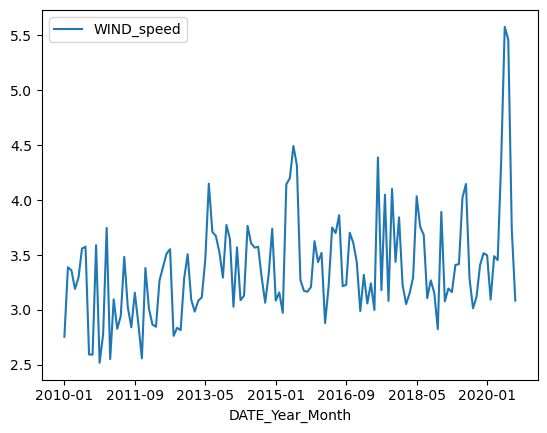

In [161]:
#画图，过去10年月均风速有缓慢上升的趋势
WIND_data_select_1.plot('DATE_Year_Month','WIND_speed')

In [162]:
#3
#读取数据
Data_3= pd.read_csv(r"D:\ESE5023\LONG BEACH DAUGHERTY AIRPORT, CA US (72297023129).csv")

D:\anzhuang\ANACONDA\Temp\ipykernel_10352\3250873878.py:3: DtypeWarning: Columns (34,35,39,40,51) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_3= pd.read_csv(r"D:\ESE5023\LONG BEACH DAUGHERTY AIRPORT, CA US (72297023129).csv")


In [163]:
#3.1
# 删除包含缺失值的列
Data_3_1=Data_3.dropna(axis='columns')

#日期
Month=Data_3_1["DATE"].astype(str).str[:7]

#分别取出TMP列的air temperature、air temperature quality
air_temperature=Data_3_1["TMP"].astype(str).str[0:5]
air_temperature_quality=Data_3_1["TMP"].astype(str).str[6]

#把需要用到的3列数据重新组成一个dataframe，重命名每列
air_temperature_data=pd.concat([Month,air_temperature,air_temperature_quality], axis=1)
air_temperature_data.columns = ["Month",'air_temperature', 'air_temperature_quality']

#数据筛选，air_temperature=+9999（Missing），air_temperature_quality=3（Erroneous）
air_temperature_data=air_temperature_data.loc[(air_temperature_data["air_temperature"]!="+9999")&(air_temperature_data["air_temperature_quality"]!="3")]

<Axes: xlabel='Month'>

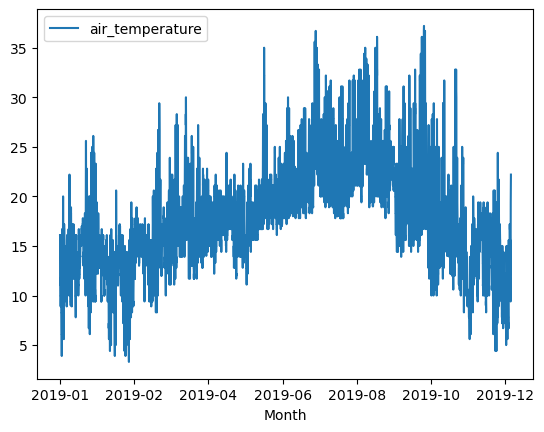

In [164]:
#3.2 
#温度变成小数点格式
air_temperature_data['air_temperature']=air_temperature_data['air_temperature'].astype(float)

#缩放因子 SCALING FACTOR=10，摄氏度
air_temperature_data['air_temperature']=air_temperature_data['air_temperature']/10

#日期-温度图
air_temperature_data.plot('Month','air_temperature')

In [165]:
air_temperature_data

,Month,air_temperature,air_temperature_quality
0,2019-01,16.1,1
1,2019-01,16.1,5
2,2019-01,15.6,5
3,2019-01,14.4,5
4,2019-01,13.9,5
...,...,...,...
12528,2019-12,20.0,5
12529,2019-12,21.1,5
12530,2019-12,21.7,5
12531,2019-12,22.2,5


In [166]:
#3.3
#3.3.1 求平均温度
air_temperature_data["air_temperature"].mean()

17.659256211946683

In [167]:
#3.3.2 求温度标准差
air_temperature_data["air_temperature"].std()

5.112108137274478

In [168]:
#3.3.3 求最低温度所在行的数据
air_temperature_data.loc[air_temperature_data["air_temperature"].argmin()]

Month                      2019-02
air_temperature               13.9
air_temperature_quality          5
Name: 1855, dtype: object

In [169]:
#3.3.4 随机取10天数据,求最高温度
air_temperature_data.sample(n=10)["air_temperature"].max()

21.7

In [170]:
#3.3.5 统计温度出现的次数
air_temperature_data["air_temperature"].value_counts()

15.6    636
16.7    540
16.1    538
15.0    528
18.3    507
       ... 
36.1      2
29.0      1
26.0      1
8.0       1
7.0       1
Name: air_temperature, Length: 79, dtype: int64